# タイタニックデータ科学ソリューション

---

## ワークフローの段階

競合ソリューションのワークフローは、7つの段階を経ています。

1.質問または問題の定義。
2.訓練および試験データを取得する。
3.データをまとめる、準備する、浄化する。
4.分析し、パターンを特定し、データを探索する。
5.問題をモデル化し、予測し、解決する。
6.問題解決のステップと最終的な解決方法を視覚化し、報告し、提示する。
7.結果を提出する。

ワークフローは、各ステージがどのステージに沿っているかを示す一般的なシーケンスを示します。ただし、例外を持つユースケースがあります。

- 複数のワークフローステージを組み合わせることができます。我々は、データを視覚化することによって分析することができる。
 - 指示されたよりも早くステージを行う。私たちは、論争前後のデータを分析するかもしれません。
 - 私たちのワークフローで何度もステージを実行します。視覚化ステージは複数回使用できます。
 - ステージを一杯落とす。競争のために私たちのデータセットを有効にするために、製品化やサービスのための供給段階は必要ないかもしれません。

## 質問と問題の定義

Kaggleのような流行サイトは、解決すべき問題や質問する質問を定義し、データサイエンスモデルを訓練するためのデータセットを提供し、テストデータセットに対してモデル結果をテストします。タイタニックサバイバル競技の質問または問題の定義は、[Kaggle（https://www.kaggle.com/c/titanic）でここに記述されています。

タイタニック災害から生き残った、または生き残っていない乗客を列挙したトレーニングセットを知ることにより、テストデータセット内のこれらの乗客が生存しているかどうかにかかわらず、モデルは生存情報を含まない所定のテストデータセットに基づいて決定できます。

私たちはまた、問題の領域について早期に理解を深めたいと思うかもしれません。これは[Kaggle competition description page here]（https://www.kaggle.com/c/titanic）に記載されています。ここで注目すべきハイライトです。

 -  1912年4月15日に、タイタニック号は乙女の航海中に氷山に衝突して沈んで、2224人の乗客と乗組員のうち1502人が死亡した。翻訳された32％の生存率。
 - 難破船がこのような人命を奪った原因の1つは、乗客と乗組員のための救命艇が足りないということでした。
 - 沈没を生き延びるためには運がいくつかあったが、女性、子供、上層階など他の人々よりも生き残る可能性が高いグループもあった。

## ワークフローの目標

データ科学ソリューションのワークフローは、7つの主要な目標を解決します。

**分類する。**我々はサンプルを分類または分類したいかもしれない。また、さまざまなクラスとソリューションの目標との関連性や相関性を理解したい場合もあります。

**相関**トレーニングデータセット内の利用可能な特徴に基づいて問題に近づくことができます。データセット内のどの特徴がソリューションの目標に大きく貢献していますか？

**変換する。**モデリング段階では、データを準備する必要があります。モデルアルゴリズムの選択に応じて、すべての特徴を数値相当の値に変換する必要があるかもしれない。たとえば、テキストのカテゴリ値を数値に変換する場合です。

**完了。**データの準備では、フィーチャ内の欠損値を見積もる必要があります。モデルアルゴリズムは、欠損値がない場合に最も効果的です。

**修正**我々はまた、与えられた訓練データセットを、特徴内のエラーまたはおそらく無価値の値について分析し、これらの値を是正するか、またはエラーを含むサンプルを除外することができる。これを行うための1つの方法は、サンプルまたはフィーチャの間で異常値を検出することです。分析に貢献していない場合、または結果に著しい歪みが生じている場合、特徴を完全に破棄することもあります。

**作成**既存のフィーチャまたはフィーチャのセットに基づいて新しいフィーチャを作成して、フィーチャが相関、変換、完全性の目標に従うようにすることができます。

**グラフ作成**データの性質とソリューションの目標に応じて適切な視覚化プロットとグラフを選択する方法。


# 必要なライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習

#ロジスティック回帰モジュール
#ロジスティック回帰モデルは一般化線形モデルの一種である。
from sklearn.linear_model import LogisticRegression

#CVMとはサポートベクターマシン。パターン認識などに使われる分類器の一種。
from sklearn.svm import SVC, LinearSVC

#決定木分析
from sklearn.ensemble import RandomForestClassifier

#KNeighborsClassifier = K近傍法(多クラス分類)
#K近傍法とはクラス判別用の手法。
from sklearn.neighbors import KNeighborsClassifier

#GaussianNB = ナイーブベイズ分類器
from sklearn.naive_bayes import GaussianNB

# Perxeptron = パーセプトロン
from sklearn.linear_model import Perceptron

#SGDClassifier　= SGDトレーニングを使用した線形分類（SVM、ロジスティック回帰、ao）
from sklearn.linear_model import SGDClassifier

#DecisionTreeClassifier = 決定木分析 
from sklearn.tree import DecisionTreeClassifier

## データを取得する

Python Pandasパッケージは、私たちのデータセットで作業するのに役立ちます。まず、Pandas DataFramesにトレーニングデータセットとテストデータセットを取得します。また、これらのデータセットを組み合わせて、両方のデータセットで特定の操作を実行します。

In [2]:
# データのインプット

train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
combine = [train_df, test_df]

## データを記述して解析する

Pandasはまた、プロジェクトの早い段階で質問に答えるデータセットを記述するのに役立ちます。

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']



**どの特徴がカテゴリになっていますか？**

これらの値は、サンプルを同様のサンプルのセットに分類する。カテゴリフィーチャ(特徴）には、公称、序数、比率、または間隔に基づく値があります。とりわけ、これは視覚化に適したプロットを選択するのに役立ちます。


- カテゴリ: Survived, Sex, and Embarked. Ordinal: Pclass.

**どの特徴が数値ですか？**

どの特徴が数値ですか？これらの値はサンプルごとに変化します。数値フィーチャ内に離散、連続、または時系列の値がありますか？とりわけ、これは視覚化に適したプロットを選択するのに役立ちます。

- 数値: Age, Fare. Discrete: SibSp, Parch.

In [4]:
# データの確認
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**どの特徴が混合データタイプですか？**

同じ特徴内の数値の英数字データ。これらは目標を修正するための候補です。

 - Ticketは、数字と英数字のデータタイプが混在しています。Cabinは英数字です。

**さまざまな特徴のデータタイプは何ですか？**

これは大規模なデータセットを検討するのは難しいですが、小さなデータセットからいくつかのサンプルを見直すと、どの特徴を修正する必要があるかがわかります。

 - 名前の特徴には、タイトルや丸括弧、代替名や略称に使用される引用符など、名前を記述するためのいくつかの方法があるため、エラーや誤字が含まれることがあります。

In [5]:
#pandas.DataFrame.tail()はこの関数は、位置に基づいてオブジェクトから最後のn行を返します。
#これは、行の並べ替えや追加の後など、データの迅速な検証に役立ちます。
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**どの特徴に空白、空値または空の値が含まれていますか？**

これらは修正が必要です。

 -  Cabin（客室）> Age> Embarkedフィーチャには、トレーニングデータセットの順序でいくつかのNaN値が含まれています。
 - Cabin>テストデータセットの場合、年齢は不完全です。

**さまざまな特徴のデータタイプは何ですか？**

目標の転換中に私たちを助けてください。

 -  7つの特徴は、整数または浮動小数点数です。テストデータセットの場合は6つ。
 -  5つの特徴は文字列（オブジェクト）です。

In [6]:
#DataFrame.info()はこのメソッドは、インデックスdtypeと列dtypes、
#null以外の値とメモリ使用量を含むDataFrameに関する情報を出力します
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**サンプル全体の数値的特徴値の分布は何ですか？**

これは、他の初期のインサイトの中でも、実際の問題領域のトレーニングデータセットがどのように代表的であるかを判断するのに役立ちます。

 - 合計サンプルは、タイタニック号（2,224）に搭乗した乗客の実際の数の891または40％です。
 -  0または1の値を持つカテゴリ的な特徴が存続する。
 - 約38％のサンプルが実際の生存率の32％を代表して生き残った。
 - ほとんどの乗客（> 75％）は親または子供と一緒に旅行しなかった。
 - 乗客のほぼ30％が兄弟姉妹や配偶者を乗せていました。
 - 運賃は、乗客数が少ない（1％未満）場合は512ドル高いと大幅に変動しました。
 -  65歳から80歳までの高齢者（<1％）はほとんどありません。

In [7]:
#平均や標準偏差、最大値、最小値、最頻値などの要約統計量を取得
train_df.describe()
# 私たちの問題の記述が38％の生存率を指摘していることを知って=[.61, .62]` を使って生存率を再検討する。
# percentiles=[.75, .8]`を使ってParchの配布を確認する
# SibSp ディストリビューション `[.68, .69]`
# 年齢と運賃`[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**カテゴリ特徴の分布は何ですか？**

- 名前はデータセット全体で一意です (count=unique=891)
- 65％の男性 (top=male, freq=577/count=891)との2つの可能な値としての性変数。
- 客室の値はいくつかのサンプルにわたって二重になっています。 あるいは、複数の乗客が客室を共有しました。
- Embarkedは3つの可能な値をとります。 ほとんどの乗客が使用するSポート（top = S）*sportとは舟の右側
- チケットの特徴は重複した値 (unique=681)の特徴が(22%) が高い

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Flynn, Mr. John Irwin (""Irving"")",male,347082,G6,S
freq,1,577,7,4,644


### データ解析に基づく仮定

これまでに行われたデータ分析に基づいて、以下の前提に着きました。適切な措置を講じる前に、これらの前提条件をさらに検証することがあります。


**相関関係**

私たちは、各特徴がどのようにサバイバルと相関しているかを知りたいと思っています。プロジェクトの早い段階でこの作業を行い、プロジェクトの後半でモデル化された相関関係とこれらの迅速な相関関係を一致させたいと考えています。

**完了。**

1.　生存と明らかに相関があるため、年齢特徴を完成させたいかもしれません。
2.　生存または他の重要な特徴と相関する可能性があるため、Embarked特徴を完成させたい場合があります。


**修正する。**

1.　重複率（22％）が高く、チケットと生存率の間に相関がない可能性があるため、チケット特徴は分析から除外される可能性があります。
2. 客室特徴は、トレーニングデータとテストデータセットの両方で非常に不完全であるか、または多くのnull値を含んでいるため、削除される可能性があります。
3.　生存に寄与しないため、旅客Idはトレーニングデータセットから削除される可能性があります。
4.　名前の特徴は比較的非標準であり、生存に直接貢献しない可能性があります

**作成。**

1. ParchとSibSpに基づいてFamilyという新しい特徴を作成し、家族の総数を取得したい場合があります。
2.　名前特徴を使用して、タイトルを新しい特徴として抽出することができます。
3. Ageバンドの新しい特徴を作成したい場合があります。これは、連続的な数値的特徴を序数的カテゴリー的特徴に変える。
4.　分析に役立つ場合は、Fare範囲特徴を作成することもできます。

**分類。**

また、前に述べた問題の記述に基づいて、私たちの前提に追加することもあります。

1. 女性（性別=女性）は生存していた可能性が高い。
2. 子供（年齢<？）は生存していた可能性が高い。
3. 上位クラスの乗客（Pclass = 1）は生き残った可能性が高い。

## ピボット特徴による解析

私たちの観測と仮定の一部を確認するために、特徴の相互関係を素早く相互にピボットすることで、特徴の相関関係を素早く分析できます。 この段階では空の値を持たない特徴に対してのみ行うことができます。 また、カテゴリ（性別）、順序（Pclass）または離散（SibSp、Parch）タイプの特徴に対してのみ、そうすることが理にかなっています。

- ** Pclass ** Pclass = 1とSurvived（分類＃3）の間に有意な相関（> 0.5）が観察される。 この特徴をモデルに含めることにしました。
- **性別**性別=女性の生存率が74％（＃1の分類）で非常に高いという問題定義の間の観察を確認する。
- ** SibSpとParch **これらの特徴は、特定の値に対してゼロ相関を有する。 これらの個々の特徴からセットを導出することが最善の方法です（＃1を作成する）。


In [9]:
#groupy、asindex=Falseでインデックスとして扱うのをやめてくれる
#列の値を合計した平均をソート（asending ＝ Falseで逆順）
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000



## データを視覚化して解析する

今度は、データを分析するための視覚化を使用して、いくつかの前提を確認していきます。

### 数値特徴の相関

数値フィーチャとソリューション目標（Survived）との相関を理解することから始めましょう。

ヒストグラムチャートは、バンディングや範囲が有用なパターンを特定するのに役立つ年齢のような連続的な数値変数を分析するのに便利です。ヒストグラムは、自動的に定義されたビンまたは等間隔のバンドを使用したサンプルの分布を示すことができます。これは、特定のバンドに関する質問に答えるのに役立ちます（幼児の生存率はより良いですか？）

ヒストグラム視覚化におけるx軸は、サンプルまたは乗客の数を表すことに注意してください。

**観察。**

 - 幼児（年齢= 4歳）は高い生存率を示した。
 - 最も古い乗客（年齢= 80）が生き残った。
 -  15-25歳の多数が生き残れなかった。
 - ほとんどの乗客は15-35歳の範囲にあります。

**決定。**

この単純な分析により、後続のワークフローステージの決定として、前提条件が確認されます。

 - 私たちはモデルトレーニングで年齢（＃2の私たちの仮定）を考慮する必要があります。
 - 欠損値の年齢特徴を完了する（＃1を完了する）。
 - 私たちは年齢層を縛るべきです（＃3を作る）。

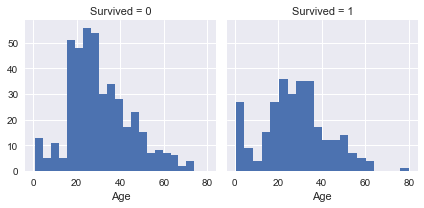

In [13]:
#FacetGridは分割していくつかのグラフを出す
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### 数字と序数の特徴の相関

1つのプロットを使用して相関を識別する複数の特徴を組み合わせることができます。これは、数値を持つ数値的および類型的な特徴を用いて行うことができる。

**観察。**

 -  Pclass = 3がほとんどの乗客を持っていたが、ほとんどは生き残れなかった。私たちの分類の仮定＃2を確認します。
 -  Pclass = 2およびPclass = 3の幼児の乗客はほとんどが生き残った。さらに、我々の分類する仮定＃2を満たす。
 -  Pclass = 1のほとんどの乗客は生き残った。私たちの分類の仮定＃3を確認します。
 -  Pclassは、乗客の年齢分布によって異なります。

**決定。**

 - モデルトレーニングのためにPclassを検討してください。

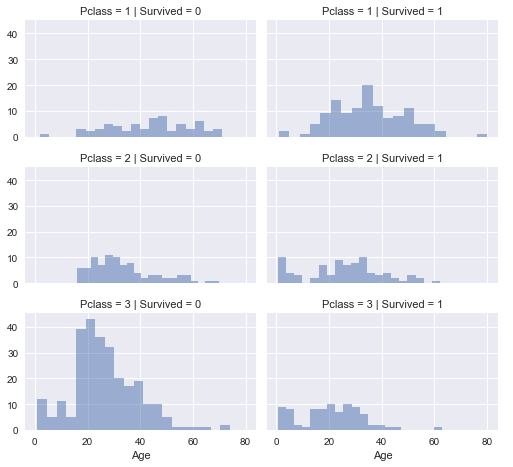

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
#add_legendで複数の特徴を混ぜて表示
grid.add_legend();

### カテゴリ特徴の相関

これで、カテゴリの特徴とソリューションの目標を関連付けることができます。

**観察。**

- 女性の乗客は男性よりもはるかに良好な生存率を示した。 分類を確認します（＃1）。
- 男性の生存率が高いEmbarked = Cの例外。 これは、PclassとEmbarkedとの間の相関性であり、Pclass and Survivedであり、必ずしもEmbarkedとSurvivedの間の直接的な相関関係ではない。
- CおよびQポートでPclass = 2と比較した場合、男性はPclass = 3でより良い生存率を示した。 完了（＃2）。
- 乗船港は、Pclass = 3および男性乗客の生存率が異なる。 相関（＃1）。

**決定。**

- モデルトレーニングに性的特徴を追加する。
- モデルトレーニングにEmbarked特徴を追加して追加します。

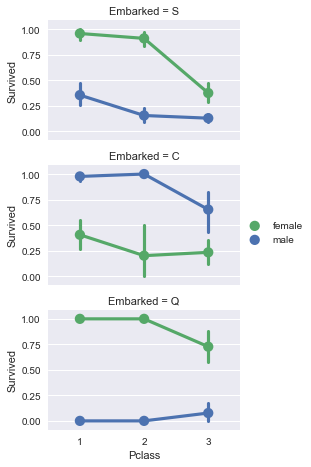

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## カテゴリと数値の相関

また、（数値以外の値を持つ）カテゴリ特徴と数値特徴を関連付けることもできます。 私たちは、受動態（カテゴリー非数値）、性別（カテゴリー非数値）、運賃（数値連続）、生存（カテゴリカル数値）と相関させることを検討できます。

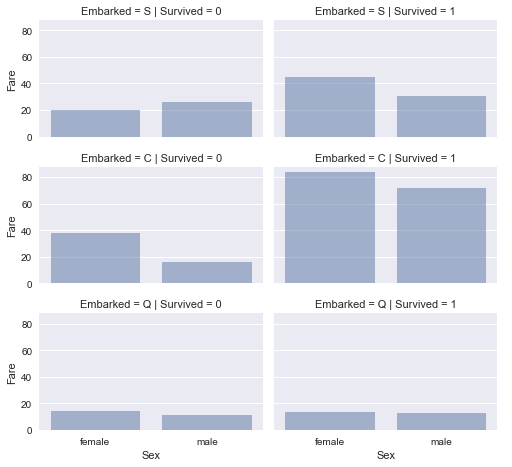

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Wrangle data

私たちは、データセットとソリューション要件に関するいくつかの前提と決定を収集しました。 これまでは、単一の特徴や価値を変更してこれらに到達する必要はありませんでした。 目標を修正、作成、完了するための決定と前提を実行しましょう。

### 特徴を削除することで修正する

これは実行するための良い開始目標です。 特徴を削除することで、データポイントの数が減少します。 私たちのノートブックをスピードアップし、分析を楽にします。

私たちの前提と決定に基づいて、Cabin（＃2の修正）とTicket（＃1の修正）の特徴を削除したいと考えています。

該当する場合は、訓練データセットとテストデータセットの両方で操作を実行して、一貫性を保ちます。

In [17]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))


### 既存のものから新しい特徴抽出を作成する

私たちはNameの特徴をNameとPassengerIdの特徴を削除する前に、タイトルを抽出し、タイトルと生存の相関関係をテストするように設計できるかどうかを分析したい。

次のコードでは、正規表現を使用してタイトル特徴を抽出します。 RegExパターン `（\ w + \。）`は、名前フィーチャー内のドット文字で終わる最初の単語と一致します。 `expand = False`フラグはDataFrameを返します。

**観察。**

タイトル、年齢、生存率をプロットすると、次のような観察結果が得られます。

- ほとんどのタイトルは、年齢層を正確に区別します。 例：マスタータイトルの年齢は平均5歳です。
- タイトル年齢帯の生存はわずかに異なります。
- 一部のタイトルはほとんどが生き残った（Mme、Lady、Sir）か、（Don、Rev、Jonkheer）。

**決定。**

- モデルトレーニングのための新しいタイトル特徴を保持することに決めました。

In [18]:
for dataset in combine:
    #str.extract　＝　正規表現で分割
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


私たちは、多くのタイトルをより一般的な名前に置き換えることも、「希少なもの」として分類することもできます。

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


私たちは、カテゴリタイトルを序数に変換することができます。

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


これで、トレーニングとテストのデータセットから名前特徴を安全に削除できます。また、トレーニングデータセットにPassengerId特徴は必要ありません。

In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

###カテゴリ特徴の変換

文字列を含む特徴を数値に変換できるようになりました。これは、ほとんどのモデルアルゴリズムで必要です。そうすることで、特徴の達成目標を達成するのにも役立ちます。

性特徴を、女性= 1、男性= 0の性別という新しい特徴に変換してみましょう。

In [22]:
for dataset in combine:
    #mapは全ての要素に適用してくれる
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 数値連続的なフィーチャを完成する

今度は、欠損値またはヌル値を持つフィーチャを推定して完成させる必要があります。まず、年齢特徴のためにこれを行います。

我々は、数値連続的特徴を完成させる3つの方法を検討することができる。

1.簡単な方法は、平均と標準偏差の間に乱数を生成することです。

欠損値を推測するより正確な方法は、他の相関フィーチャを使用することです。我々のケースでは、年齢、性別、およびPクラスの間の相関を記録する。 PclassとGenderの特徴の組み合わせのセット全体で[年齢]の中央値を使用してAgeの値を推測します。したがって、Pclass = 1、Gender = 0、Pclass = 1、Gender = 1などの中間年齢など

3.方法1と2を組み合わせる。そのため、中央値に基づいて年齢値を推測する代わりに、PclassとGenderの組み合わせのセットに基づいて平均と標準偏差の間の乱数を使用する。

方法1と3はランダムノイズを我々のモデルに導入する。複数回の実行結果が異なる可能性があります。方法2を優先します。

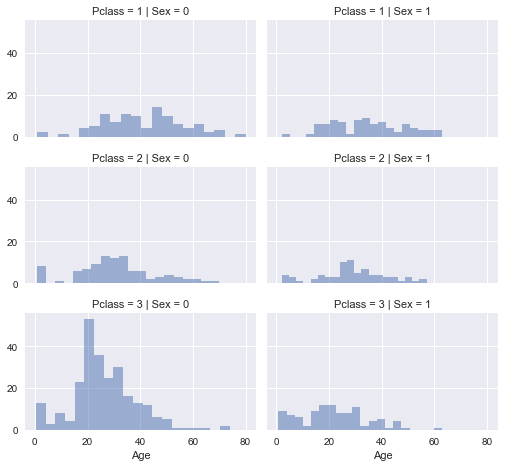

In [23]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Pclass x Genderの組み合わせに基づいて推測されたAge値を含む空の配列を準備することから始めましょう。

In [24]:
#0の行列作成
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

今度は、Sex（0または1）とPclass（1,2,3）を繰り返し、6つの組み合わせのAgeの推測値を計算します。

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            #Ageの欠損を削除し数字を繰り返したものを代入
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            #中央ちを代入
            age_guess = guess_df.median()

            # ランダムな年齢の浮動小数点を最も近いものに変換する .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Ageバンドを作成し、Survivedとの相関を決定しましょう。

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


これらのバンドに基づいて年齢を序数に置き換えましょう。

In [27]:
#各年齢層を振り分け
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"


AgeBand特徴を削除することはできません。

In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### 既存の特徴を組み合わせて新しい特徴を作成する

ParchとSibSpを組み合わせたFamilySizeの新しい特徴を作成できます。これにより、データセットからParchとSibSpを削除できます。

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


IsAloneという別の特徴を作成することができます。

In [30]:
#DF.loc = 変更や代入 
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Parch、SibSp、およびFamilySizeの特徴をIsAloneに譲りましょう。

In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


PclassとAgeを組み合わせた人工的な特徴を作成することもできます。

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


###カテゴリ特徴を完成する

Embarked特徴は、乗車港に基づいてS、Q、Cの値を取る。 トレーニングデータセットには2つの欠損値があります。 最も一般的な出現でこれらを記入するだけです。

In [33]:
#df.mode　= 選択された軸に沿った各要素のモードを取得します。
#ラベルごとに各モードの行を追加し、ギャップをナノで埋めます。
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


###カテゴリ特徴を数値に変換する

新しい数値ポート特徴を作成することで、EmbarkedFill特徴を変換できるようになりました。

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### クイックコンプリートと数値特徴の変換

この特徴で最も頻繁に発生する値を取得するために、モードを使用してテストデータセットの単価が不足している場合のFare特徴を完成させることができます。 これは1行のコードで行います。

中間値の新しいフィーチャを作成したり、フィーチャが欠落していると推測するための相関分析を行ったりしていないことに注意してください。 完成目標は、モデルアルゴリズムが非ヌル値で動作するための望ましい要件を達成する。

通貨を表しているので、運賃を二桁の小数点以下に切り捨てたい場合もあります。

In [36]:
#inplace = ブール値
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


FareBandを作成することはできません。

In [37]:
#pd.qcut = Quantileベースの離散化関数。ランクに基づいて、またはサンプルの分位数に基づいて、
#同サイズのバケットに変数を離散化する。
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


FareBandに基づいてFare特徴を順序値に変換します。

In [38]:
#各要素を振り分け
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


そしてテストデータセット。

In [39]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## モデル、予測、解決

これで、モデルをトレーニングし、必要なソリューションを予測する準備が整いました。 60以上の予測モデリングアルゴリズムがあります。 我々が評価できるいくつかの選択されたモデルに絞るためには、問題の種類と解決策の要件を理解する必要があります。 私たちの問題は、分類と回帰の問題です。 他の変数や特徴（性別、年齢、ポートなど）との関係（生存しているか否か）を特定したい。 私たちは、与えられたデータセットでモデルを訓練しているので、教師あり学習と呼ばれる機械学習のカテゴリーにも通っています。 これらの2つの基準（教師あり学習と分類と回帰）では、モデルの選択肢をいくつかに絞り込むことができます。 これらには、

- ロジスティック回帰
- KNNまたはk-Nearest Neighbors
- サポートベクターマシン
- ナイーブベイズ分類器
- 意思決定ツリー
- ランダムフォレスト
- パーセプトロン
- 人工ニューラルネットワーク
- RVMまたは関連性ベクトルマシン

In [40]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

ロジスティック回帰は、ワークフローの早期に実行するのに便利なモデルです。 ロジスティック回帰は、累積ロジスティック分布であるロジスティック関数を使用して確率を推定することによって、カテゴリ依存変数（特徴）と1つ以上の独立変数（特徴）との間の関係を測定する。

トレーニングデータセットに基づいてモデルによって生成された信頼スコアに注目してください。

In [41]:
# ロジスティック回帰

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.359999999999999

ロジスティック回帰を使用して、特徴作成と目標達成のための前提と決定を検証できます。 これは、決定関数内の特徴の係数を計算することによって行うことができる。

正の係数は応答の対数 - オッズを増加させ（したがって確率を増加させる）、負の係数は応答の対数 - オッズを減少させる（したがって確率を減少させる）。

- 性別が最も高い正の係数で、性別の値が増加する（男性：0〜女性：1）ことを意味し、生存確率= 1が最も高くなります。
- 逆にPclassが増加すると、Survived = 1の確率が最も低下します。
- このように、Age * Classは、Survivedと2番目に高い負の相関関係を持つため、モデル化するのに適した人工的な特徴です。
- 次に、タイトルが2番目に高い正の相関関係になります。

In [42]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749007


次に、分類および回帰分析に使用されるデータを分析する関連する学習アルゴリズムを備えた監視学習モデルであるサポートベクターマシンを使用してモデル化します。 ** 2つのカテゴリ**のいずれかに属するとマークされた一連のトレーニングサンプルが与えられた場合、SVMトレーニングアルゴリズムは新しいテストサンプルをあるカテゴリまたは他のカテゴリに割り当てるモデルを構築し、確率的ではないバイナリにします 線形分類器。 

モデルはロジスティック回帰モデルよりも高い信頼スコアを生成することに注意してください。

In [43]:
# サポートベクターマシン

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.840000000000003

パターン認識において、k-Nearest Neighborsアルゴリズム（または略してk-NN）は、分類および回帰に使用される非パラメトリックな方法である。 サンプルは、その近隣のものの多数決によって分類され、そのサンプルは、k個の最近傍（kは正の整数、通常は小さい）の中で最も一般的なクラスに割り当てられる。 k = 1の場合、オブジェクトはその単一の最近傍のクラスに単純に割り当てられます。 

KNN信頼スコアはロジスティック回帰よりも良いがSVMより悪い。

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.739999999999995

機械学習では、ナイーブベイズ分類子は、ベイズの定理に特徴間の強い（素朴な）独立性仮定を適用した単純な確率的分類子のファミリーです。 Naive Bayes分類器はスケーラビリティが高く、学習問題の変数（フィーチャ）数に線形のパラメータが必要です。

モデル生成信頼スコアはこれまでに評価されたモデルの中で最も低い。

In [45]:
# ナイーブベイズ分類

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.280000000000001

パーセプトロンは、バイナリ分類器（数字のベクトルで表される入力が特定のクラスに属するかどうかを決定する関数）の教師付き学習のアルゴリズムです。 線形分類器の一種であり、線形予測器関数に基づいて予測を行い、重みの組を特徴ベクトルと組み合わせる分類アルゴリズムである。 このアルゴリズムはオンライン学習を可能にし、訓練セット内の要素を一度に1つずつ処理する

In [46]:
# パーセプトロン

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.0

In [47]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.120000000000005

In [48]:
# 確率的勾配降下
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

62.740000000000002

このモデルでは、特徴（ツリーブランチ）をターゲット値（ツリーの葉）に関する結論にマッピングする予測モデルとしてデシジョンツリーを使用します。 ターゲット変数が有限の値セットを取ることができるツリーモデルは、分類ツリーと呼ばれます。 これらの木構造では、葉はクラスラベルを表し、枝はそれらのクラスラベルにつながる特徴の接続詞を表す。 ターゲット変数が連続した値（通常は実数）を取ることができるディシジョンツリーは、回帰ツリーと呼ばれます。

モデル信頼スコアはこれまでに評価されたモデルの中で最も高い。

In [49]:
# 決定木

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.760000000000005

次のモデルのランダムフォレストは最も人気のあるものの1つです。 ランダムフォレストまたはランダム決定フォレストは、トレーニング時に多数の決定木（n_estimators = 100）を構築し、クラス（分類）のモードであるクラスを出力することによって動作する、分類、回帰および他のタスクのアンサンブル学習方法であり、 または個々の樹木の平均予測（回帰）を含む。

モデル信頼スコアはこれまでに評価されたモデルの中で最も高い。 このモデルの出力（Y_pred）を使用して、競争結果の提出を作成します。

In [50]:
# ランダムフォレスト

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.760000000000005

### モデル評価

すべてのモデルの評価をランク付けして、問題のために最良のモデルを選ぶことができます。 Decision TreeとRandom Forestのスコアは同じですが、Random Forestを使用することに決めました。決定木がトレーニングセットにあふれてしまう習慣を修正するためです。

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.00
4,Naive Bayes,72.28
6,Stochastic Gradient Decent,62.74


In [52]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)